In [2]:
# use k-means to cluster the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from data_preprocessing import get_cleaned_data_final

In [22]:
data = get_cleaned_data_final(convert_categorical=True)
print(data.columns)
target_count = data['TARGET'].value_counts()

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [23]:
# normalize the data
data = (data - data.min()) / (data.max() - data.min())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


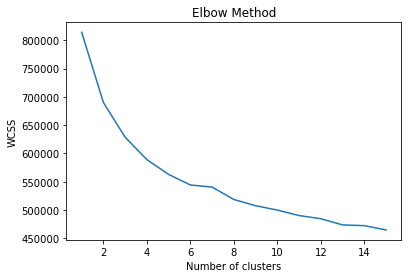

In [24]:
# use elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 16):
    print(i)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data.to_numpy())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

cluster
3    68573
0    61538
6    50912
1    48195
5    38957
2    22918
4    16417
Name: count, dtype: int64


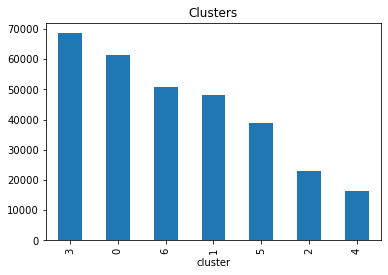

cluster
0    68573
3    55374
4    48195
5    42422
6    26644
2    24268
7    22918
1    19116
Name: count, dtype: int64


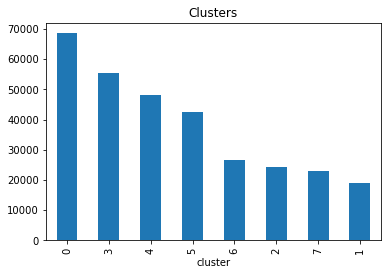

cluster
1    68573
2    55374
6    42422
3    32799
0    26644
4    24268
8    22918
7    19116
5    15396
Name: count, dtype: int64


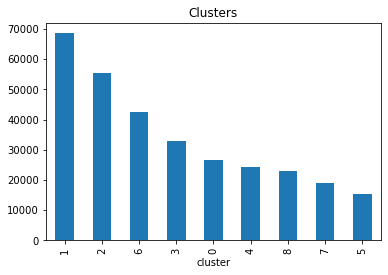

In [25]:
optimal_clusters = [7, 8, 9]
for i in optimal_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data.to_numpy())
    data['cluster'] = labels
    data['cluster'] = data['cluster'].astype('category')
    print(data['cluster'].value_counts())
    data['cluster'].value_counts().plot(kind='bar')
    plt.title('Clusters')
    plt.show()

cluster
1    68573
4    55374
0    42422
2    39664
3    32799
6    26644
7    22918
5    19116
Name: count, dtype: int64


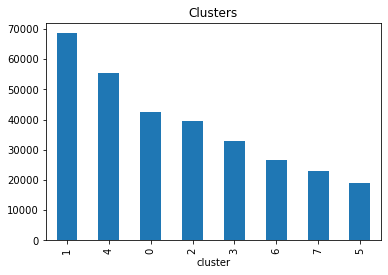

In [26]:
optimal_clusters_num = 8
kmeans = KMeans(n_clusters=optimal_clusters_num, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data.to_numpy())
data['cluster'] = labels
data['cluster'] = data['cluster'].astype('category')
print(data['cluster'].value_counts())
data['cluster'].value_counts().plot(kind='bar')
plt.title('Clusters')
plt.show()
clusters = []
for i in range(optimal_clusters_num):
    clusters.append(data[data['cluster'] == i])

In [27]:
# show cluster TAGET distribution 
col = 'TARGET'
for i in range(optimal_clusters_num):
    print('Cluster ' + str(i))
    print(clusters[i][col].value_counts() * 100 / target_count)

Cluster 0
TARGET
0.0    13.752008
1.0    14.288592
Name: count, dtype: float64
Cluster 1
TARGET
0.0    21.793085
1.0    28.065582
Name: count, dtype: float64
Cluster 2
TARGET
0.0    12.960316
1.0    12.193845
Name: count, dtype: float64
Cluster 3
TARGET
0.0    10.382191
1.0    13.897841
Name: count, dtype: float64
Cluster 4
TARGET
0.0    18.530808
1.0    12.044795
Name: count, dtype: float64
Cluster 5
TARGET
0.0    6.234833
1.0    6.006284
Name: count, dtype: float64
Cluster 6
TARGET
0.0    8.672166
1.0    8.576378
Name: count, dtype: float64
Cluster 7
TARGET
0.0    7.674593
1.0    4.926684
Name: count, dtype: float64
